In [37]:
import numpy as np
from pathlib import Path

import h5py
import matplotlib.pyplot as plt

In [38]:
file_path = Path('/Users/williambishop/Desktop/TM0000028_CM0_CHN00.h5')

In [39]:
f = h5py.File(file_path, 'r')

In [40]:
list(f.keys())

['default']

In [41]:
dt = f['default']

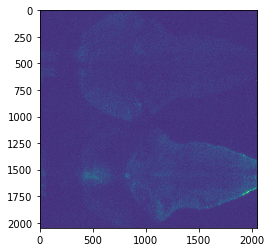

In [42]:
plt.imshow(dt[10,:,:])

In [27]:
a = dt.attrs.keys()

In [28]:
for i in a:
    print(i)

ValuesViewHDF5(<Attributes of HDF5 object at 4596113480>)